# Heat Waves - IFS
---

Here we will focus on:
- [`2t`](https://codes.ecmwf.int/grib/param-db/167) 2 metre temperature,
- [`mn2t3`](https://codes.ecmwf.int/grib/param-db/228027) minimum temperature at 2 metres in the last 3 hours, and
- [`mx2t3`](https://codes.ecmwf.int/grib/param-db/228026) maximum temperature at 2 metres in the last 3 hours in France on 30 April at 12 UTC.

:::{tip}
If you have not visited the [Heat Waves - AIFS](./heat-waves-aifs.ipynb) website yet, we highly recommend you to do so before proceeding further with the analysis.
:::

## 1. Set Up Your Environment and Find ECMWF Open Data
If the packages are not installed yet, uncomment the code below and run it.

In [14]:
# !pip3 install earthkit ecmwf-opendata

In [1]:
from ecmwf.opendata import Client
import earthkit.data as ekd
import earthkit.plots as ekp

(content:references:listParam_hwi)=
### List of parameters to retrieve from open datasets
The selected values below can be modified.

In [72]:
PARAM_SFC = ["mn2t3", "mx2t3", "2t"]
PARAM_PL = []
LEVELS = []
LEVELTYPE = "sfc"

DATES = [20250429, 20250430, 20250501]
TIME = 0
STEPS = 12
STREAM = "oper"
TYPE = "fc"
MODEL = "ifs"

(content:references:getData_hwi)=
### Get the data using the ECMWF Open Data API

In [73]:
def get_open_data(date, time, step, stream, _type, model, param, leveltype, levelist=[]):
    client = Client(source="aws")
    list_of_files = []
    # Get the data for all dates
    for _date in DATES:
        filename = f"{model}_{''.join(param)}_{''.join(map(str, levelist))}_{_date}.grib2" if levelist else f"{model}_{''.join(param)}_{leveltype}_{_date}.grib2"
        data = client.retrieve(
            date=_date,
            time=time,
            step=step,
            stream=stream,
            type=_type,
            levtype=leveltype,
            levelist=levelist,
            param=param,
            model=model,
            target=filename
            )
        list_of_files.append(filename)
    return data, list_of_files

## 2. 2-metre temperature
The input values can be set [here](#content:references:listParam_hwi).

In [74]:
data, list_of_files = get_open_data(date=DATES,
                                    time=TIME,
                                    step=STEPS,
                                    stream=STREAM,
                                    _type=TYPE,
                                    model=MODEL,
                                    param=PARAM_SFC,
                                    leveltype=LEVELTYPE,
                                    levelist=[])

# Select data from 30 April 2025
ds_2t = ekd.from_source("file", list_of_files[1])
ds_2t.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,ecmf,mx2t3,heightAboveGround,2,20250430,0,9-12,fc,None,regular_ll
1,ecmf,mn2t3,heightAboveGround,2,20250430,0,9-12,fc,None,regular_ll
2,ecmf,2t,heightAboveGround,2,20250430,0,12,fc,None,regular_ll


:::{important}
Some units of our data can be converted using `units` option, however, this is not possible for all of the parameters in the GRIB file. 
:::

When using the `describe()` method, a given parameter defined by `shortName` will be described.

In [32]:
t2m = ds_2t.sel(shortName="2t")
t2m.describe("2t")

shortName,2t
typeOfLevel,heightAboveGround
level,2
date,20250430
time,0
step,12
number,None
paramId,167
class,od
stream,oper
type,fc


:::{important}
One has to use the bracket operator to fetch the first element from a list and inspect its namespaces: <br>
```python
ds_2t.sel(shortName="mx2t3") # MaskIndex(GRIBReader(ifs_mn2t3mx2t32t_sfc_20250430.grib2),[0])
ds_2t.sel(shortName="mx2t3")[0] # GribField(mx2t3,None,20250430,0,12,None)
```
:::

The `dump()` method inspects all the [namespace keys](https://confluence.ecmwf.int/display/UDOC/What+are+namespaces+-+ecCodes+GRIB+FAQ) of a parameter. <br>
By clicking on different tabs below, the content of various namespaces will be displayed.

In [36]:
t2max_K = ds_2t.sel(shortName="mx2t3")[0]
t2max_K.dump()

ECCODES WARNING :  Key scaleValuesBy is applicable only during encoding.
ECCODES WARNING :  Key offsetValuesBy is applicable only during encoding.


globalDomain,g
GRIBEditionNumber,2
tablesVersionLatestOfficial,34
tablesVersionLatest,34
grib2divider,1000000
angleSubdivisions,1000000
missingValue,9999
ieeeFloats,1
isHindcast,0
section0Length,16
identifier,GRIB


In [75]:
md_t2max = t2max_K.metadata()
ds_t2max = t2max_K.values - 273.15
t2max = ekd.FieldList.from_array(ds_t2max, md_t2max)
t2max.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,ecmf,mx2t3,heightAboveGround,2,20250430,0,9-12,fc,None,regular_ll


In [76]:
t2min_K = ds_2t.sel(shortName="mn2t3")
t2min_K.metadata("units")[0]

'K'

In [77]:
md_t2min = t2min_K.metadata()
ds_t2min = t2min_K.values - 273.15
t2min = ekd.FieldList.from_array(ds_t2min, md_t2min)
t2min.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,ecmf,mn2t3,heightAboveGround,2,20250430,0,9-12,fc,None,regular_ll


## 3. Data visualisation

We will plot our data from IFS on the map defining our specific plotting methods.

:::{important}
The `earthkit` package is in development and subject to ECMWF's guidelines on [Software Maturity](https://github.com/ecmwf/codex/tree/refs/heads/main/Project%20Maturity).
:::

### IFS

The plots below show analyses of 2 metre temperature, minimum, and maximum temperature at 2 metres in the last 3 hours on 30 April at 00 UTC.

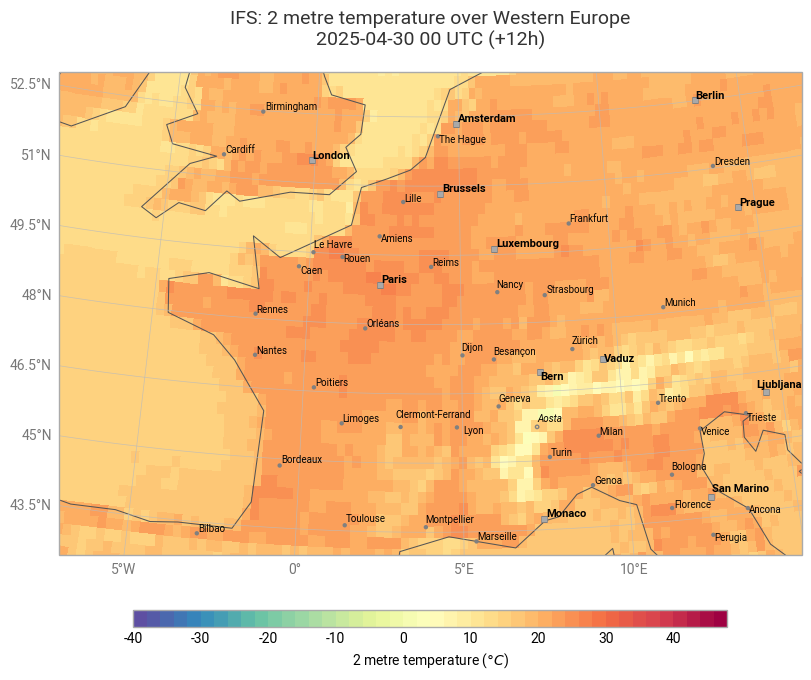

In [22]:
chart = ekp.Map(domain=[-7, 15, 43, 53])

t2m_shade = ekp.styles.Style(
    colors="Spectral_r",
    levels=range(-40, 50, 2),
    units="celsius",
)

chart.grid_cells(t2m, style=t2m_shade)

chart.title(
    "IFS: {variable_name} over Western Europe\n"
    "{base_time:%Y-%m-%d %H} UTC (+{lead_time}h)\n",
    fontsize=14, horizontalalignment="center",
)

chart.coastlines(resolution="low")
chart.gridlines()
chart.cities(adjust_labels=True)

chart.legend(location="bottom", label="{variable_name} ({units})")

chart.save(f"./plots/{PARAM_SFC[-1]}_{MODEL}_{DATES[1]}{TIME}-{STEPS}h.png")
chart.show()

<Figure size 900x700 with 0 Axes>

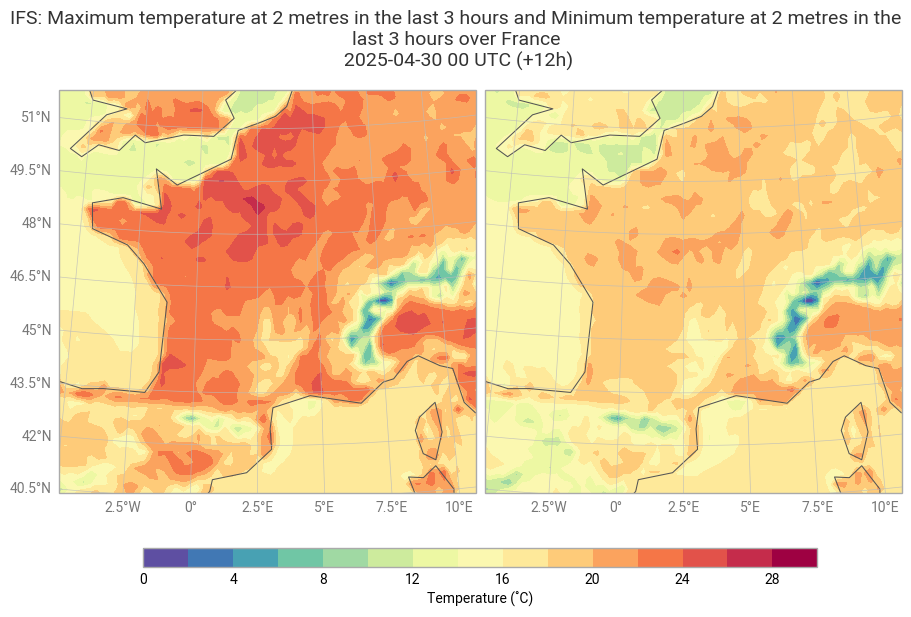

In [78]:
figure = ekp.Figure(domain="France", size=(9, 7), rows=1, columns=2)

t2maxmin_shade = ekp.styles.Style(
    colors="Spectral_r",
    levels=range(0, 32, 2),
)

figure.contourf(t2max, style=t2maxmin_shade)
subplot = figure.add_map(0, 1)
subplot.contourf(t2min, style=t2maxmin_shade)

figure.title("IFS: {variable_name} over {domain}\n {base_time:%Y-%m-%d %H} UTC (+{lead_time}h)")

figure.coastlines(resolution="low")
figure.gridlines()

figure.legend(location="bottom", label="Temperature (˚C)")

figure.save(fname=f"./plots/{''.join(PARAM_SFC[0:2])}_{MODEL}_{DATES[1]}{TIME}-{STEPS}h.png")
figure.show()

### IFS Control Forecast

In the short-range forecasts on 30 April 2025, one can see the sign of a heat-island over Paris and London.

In [60]:
PARAM_SFC = "2t"
PARAM_PL = []
LEVELS = []
LEVELTYPE = "sfc"

DATES = 20250430
TIME = 12
STEPS = [0, 48, 72, 120]
STREAM = "enfo"
TYPE = "cf"
MODEL = "ifs"

In [61]:
filename = f"{MODEL}_{PARAM_SFC}_{DATES}_{'-'.join(map(str, STEPS))}.grib2"

def get_open_data_Nsteps(filename, date, time, step, stream, _type, model, param, leveltype, levelist=[]):
    client = Client(source="aws")
    # Get the data for all steps
    data = client.retrieve(
        date=date,
        time=time,
        step=step,
        stream=stream,
        type=_type,
        levtype=leveltype,
        levelist=levelist,
        param=param,
        model=model,
        target=filename
        )
    return data

In [62]:
data = get_open_data_Nsteps(filename,
                            date=DATES,
                            time=TIME,
                            step=STEPS,
                            stream=STREAM,
                            _type=TYPE,
                            model=MODEL,
                            param=PARAM_SFC,
                            leveltype=LEVELTYPE,
                            levelist=[])

ds_ifs = ekd.from_source("file", filename)
t2m_ifs = ds_ifs.sel(shortName="2t")
t2m_ifs.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,ecmf,2t,heightAboveGround,2,20250430,1200,0,cf,0,regular_ll
1,ecmf,2t,heightAboveGround,2,20250430,1200,48,cf,0,regular_ll
2,ecmf,2t,heightAboveGround,2,20250430,1200,72,cf,0,regular_ll
3,ecmf,2t,heightAboveGround,2,20250430,1200,120,cf,0,regular_ll


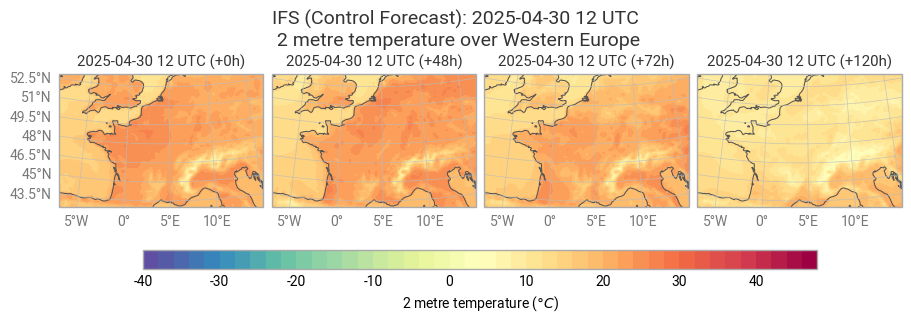

In [64]:
figure = ekp.Figure(domain=[-7, 15, 43, 53], size=(9, 9), rows=2, columns=4)

t2mifs_shade = ekp.styles.Style(
    colors="Spectral_r",
    levels=range(-40, 50, 2),
    units="celsius",
)

for i in range(4):
    figure.add_map(1+i//4, i%4)

figure.contourf(t2m_ifs, style=t2mifs_shade)

figure.coastlines()
figure.gridlines()

figure.legend(label="{variable_name} ({units})")

figure.subplot_titles("{base_time:%Y-%m-%d %H} UTC (+{lead_time}h)")
figure.title(
    "IFS (Control Forecast): {base_time:%Y-%m-%d %H} UTC\n {variable_name} over Western Europe\n\n",
    fontsize=14, horizontalalignment="center",
)
figure.save(fname=f"./plots/{PARAM_SFC}_{MODEL}_{DATES}{TIME}-{'-'.join(map(str, STEPS))}h.png")
figure.show()

:::{seealso}
Additional information about a `Figure` can be found [here](https://earthkit-plots.readthedocs.io/en/stable/_api/figures/index.html) .
:::

Compared to the IFS Control Forecast, one can note that the event was well captured by the IFS model from 30 April and onwards.

In [65]:
filename_fc="ifs_2t_20250503120000-0h.grib2"

client = Client(source="aws")
client.retrieve(
    date=20250503,
    time=12,
    step=0,
    stream="oper",
    type="fc",
    levtype="sfc",
    param='2t',
    model="ifs",
    target=filename_fc
)

In [66]:
ds_fc = ekd.from_source("file", filename_fc)
t2m_fc = ds_fc.sel(shortName="2t")
t2m_fc.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,ecmf,2t,heightAboveGround,2,20250503,1200,0,fc,None,regular_ll


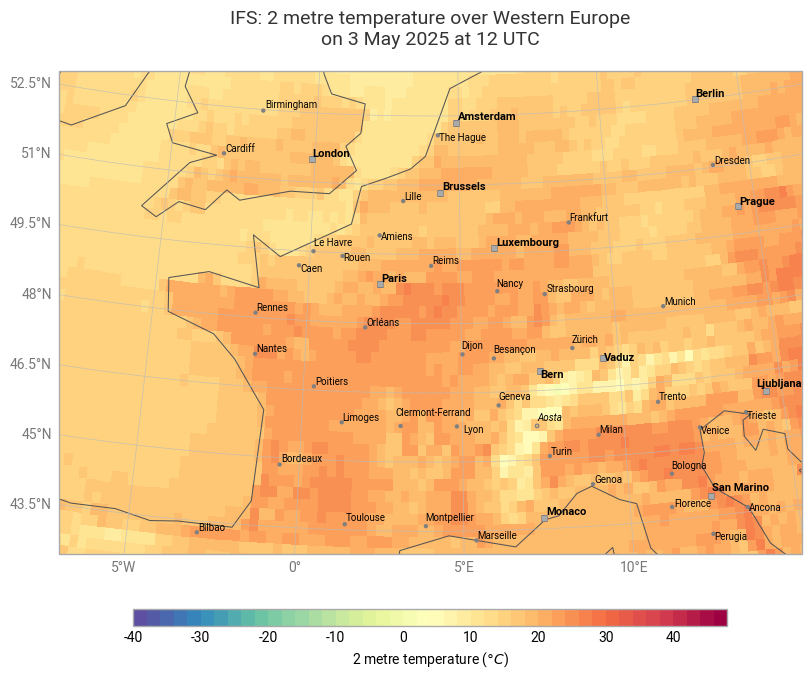

In [70]:
chart = ekp.Map(domain=[-7, 15, 43, 53])

t2mfc_shade = ekp.styles.Style(
    colors="Spectral_r",
    levels=range(-40, 50, 2),
    units="celsius",
)

chart.grid_cells(t2m_fc, style=t2mfc_shade)

chart.title(
    "IFS: {variable_name} over Western Europe\n"
    "on {time:%-d %B %Y at %H UTC}\n",
    fontsize=14, horizontalalignment="center",
)
chart.coastlines(resolution="low")
chart.gridlines()
chart.cities(adjust_labels=True)

chart.legend(location="bottom", label="{variable_name} ({units})")

chart.save("./plots/ifs_2t_20250503120000-0h.png")
chart.show()